# **Experiment 3.1 and 3.2**
### You are required to develop a model using SVM which should correctly classify the handwritten digits based on the pixel values given as features.

## By: Jasleen Minhas

## UID: 20BCS6897 


In [1]:
# Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# **Load the MNIST dataset and understanding it**

In [2]:
mnist = pd.read_csv("mnistTrain.csv") #reading the csv files using pandas

**Dataset Link**: https://drive.google.com/drive/folders/1hKv8a5iZXQ5dN4tSRrNQJTXiQ2-VjQah?usp=sharing

In [3]:
print("Image Data Shape" , mnist.shape)  # (28 by 28 images for a dimensionality of 784)


Image Data Shape (9170, 785)


* There are images each of dimension 28x28 pixels.

In [4]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Checking for missing values in the dataset 
mnist.isnull().sum().head(10)

label     0
pixel0    0
pixel1    0
pixel2    0
pixel3    0
pixel4    0
pixel5    0
pixel6    0
pixel7    0
pixel8    0
dtype: int64

In [6]:
# Checking for infinite and NAN 
print(np.any(np.isnan(mnist)))
print(np.all(np.isfinite(mnist)))

True
False


In [7]:
# Since there are nan and infinite values so filling then with the mean()
mnist.fillna(mnist.mean(), inplace=True)

In [8]:
# Now Infinite and NAN values are removed 
print(np.any(np.isnan(mnist)))
print(np.all(np.isfinite(mnist)))

False
True


In [9]:
# Data types
print(mnist.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9170 entries, 0 to 9169
Columns: 785 entries, label to pixel783
dtypes: float64(168), int64(617)
memory usage: 54.9 MB
None


In [10]:
mnist.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,9170.000000,9170.0,9170.0,9170.0,9170.0,9170.0,9170.0,9170.0,9170.0,9170.0,...,9170.00000,9170.000000,9170.000000,9170.000000,9170.000000,9170.0,9170.0,9170.0,9170.0,9170.0
mean,4.436750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.14789,0.116916,0.046025,0.019304,0.002399,0.0,0.0,0.0,0.0,0.0
std,2.888819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.37207,4.714590,2.975608,1.848369,0.229741,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.00000,253.000000,252.000000,177.000000,22.000000,0.0,0.0,0.0,0.0,0.0


Text(0.5, 1.0, 'Number of digit classes')

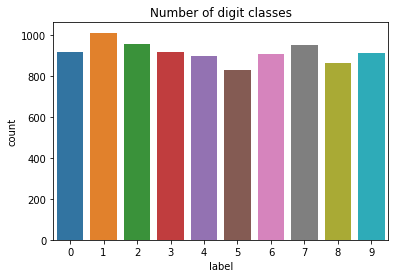

In [11]:
# Visualizing the number of class and counts in the datasets
plt.plot(figure = (16,10))
graph = sns.countplot(mnist["label"])
plt.title('Number of digit classes')

## **Split the dataset into training and test set**

The code below splits the data into training and test data sets, where, test_size=0.3 

In [12]:
y = mnist['label']

## Dropping the variable 'label' from X variable 
X = mnist.drop(columns = 'label')

## Printing the size of data 
print(X.shape)

(9170, 784)


In [15]:
# Test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, train_size = 0.7 ,random_state = 10)


In [16]:
# X is the image
X_train.shape, X_test.shape

((6419, 784), (2751, 784))

In [17]:
# y is the label
y_train.shape, y_test.shape

((6419,), (2751,))

### Preview some images

In [18]:
X_train = np.array(X_train)
print(type(X_train))

<class 'numpy.ndarray'>


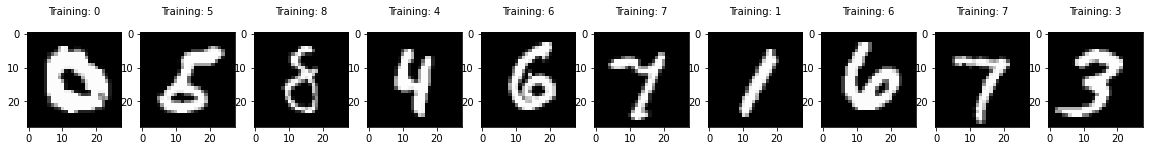

In [19]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:10], y_train[0:10])):
 plt.subplot(1, 10, index + 1)
 plt.imshow(image.reshape(28,28), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 10)


# **Modelling - SVM (Linear Model)** 

In [20]:
from sklearn.svm import SVC
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

# predict
y_pred = model_linear.predict(X_test)

## **Measure the Accuracy of the Linear SVM**

In [21]:
# Confusion matrix  and accuracy
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9178480552526354 

[[255   0   1   1   0   3   2   0   0   0]
 [  0 287   0   2   0   1   0   1   2   1]
 [  1   2 284   4   3   3   0   3   4   0]
 [  1   1   6 246   0  11   1   1   8   1]
 [  0   0   2   0 250   0   0   2   0  11]
 [  0   5   1  12   3 225   2   1   1   4]
 [  7   1   5   0   2   6 251   0   0   0]
 [  3   1   4   0   1   0   1 276   0  13]
 [  1   9   7   7   0   6   1   3 214   4]
 [  2   0   1   2  16   1   0  12   2 237]]


In [22]:
print(model_linear.predict(X_test[0:9]))
print([y_test[0:9]])

[5 7 1 4 1 6 3 2 9]
[8613    5
5443    7
6097    1
1295    4
5229    1
1052    6
8202    3
1419    2
6999    9
Name: label, dtype: int64]


In [23]:
# training score
train_score = model_linear.score(X_train, y_train)
print(train_score)

1.0


In [24]:
# testing score
test_score = model_linear.score(X_test, y_test)
print(test_score)

0.9178480552526354


### **Important points:**
For Linear SVM Model

* **Acurracy for training set: 100%**

* **Acurracy for testing set: 91%**

The linear model gives approx. 91% accuracy.

### **Performance report**

In [25]:
# class-wise accuracy
class_wise = metrics.classification_report(y_true=y_test, y_pred=y_pred)

print("Performance Report: \n",class_wise)

Performance Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       262
           1       0.94      0.98      0.96       294
           2       0.91      0.93      0.92       304
           3       0.90      0.89      0.89       276
           4       0.91      0.94      0.93       265
           5       0.88      0.89      0.88       254
           6       0.97      0.92      0.95       272
           7       0.92      0.92      0.92       299
           8       0.93      0.85      0.89       252
           9       0.87      0.87      0.87       273

    accuracy                           0.92      2751
   macro avg       0.92      0.92      0.92      2751
weighted avg       0.92      0.92      0.92      2751



# **Display predictions on some random images from test set**

In [26]:
# function to convert float image to uint8, and map values in range 0-255
def process(image):
    image -= image.min()
    image /= image.max()
    image *= 255
    return image.astype(np.uint8)

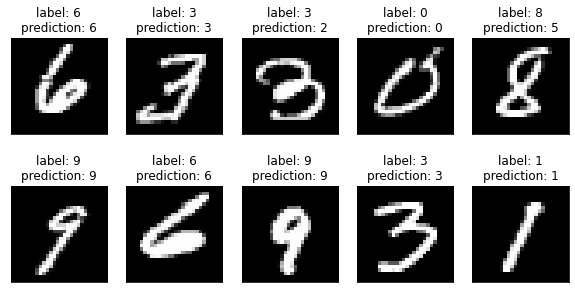

In [27]:
# display predictions on some random images from test set
plt.figure(figsize=(10,5))

R, C = 2, 5
N = R * C
indices = np.random.randint(0, len(X_test), size=N)
X_test = np.array(X_test)
y_test = np.array(y_test)

for i, idx in enumerate(indices):
    test_image = X_test[idx].reshape(1,-1)
    prediction = model_linear.predict(test_image)[0]
    ax = plt.subplot(R, C, i + 1)
    plot_image = process(test_image.reshape((28, 28)))
    ax.title.set_text(f'label: {y_test[idx]}\nprediction: {prediction}')
    ax.imshow(plot_image, cmap='gray')
    plt.xticks([]), plt.yticks([])
plt.show()

# **Display Misclassified images with Predicted Labels (MNIST) with linear SVM**

In [28]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedCount = 0

# Storing the misclassified images from the test set 
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
  if label != predict: 
    misclassifiedIndexes.append(index)
    misclassifiedCount += 1 
  index += 1


In [29]:
print("Total Number of misclassified images from testing set out of ",index," is: ", misclassifiedCount)

Total Number of misclassified images from testing set out of  2751  is:  226


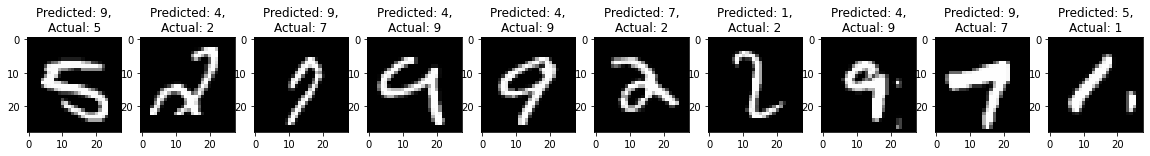

In [30]:
# Plotting misclassified images from testing set

plt.figure(figsize=(20,4))
test_img = np.array(X_test)
predictions = np.array(y_pred)
test_lbl = np.array(y_test)
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:10]):
 plt.subplot(1, 10, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title(f'Predicted: {predictions[badIndex]},\nActual: {test_lbl[badIndex]}')

# **Modelling - SVM (Non Linear Model)** 

In [31]:
# non-linear model
# using rbf kernel, C=1, default value of gamma

# model
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

## **Measure the Accuracy of the Non Linear (RBF) SVM**

In [32]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9611050527081061 

[[260   0   0   0   0   0   2   0   0   0]
 [  0 286   2   2   1   1   0   0   1   1]
 [  1   1 293   0   2   0   0   3   3   1]
 [  0   0   6 259   0   4   1   1   5   0]
 [  0   0   0   0 257   0   0   0   0   8]
 [  0   2   1   3   1 243   1   0   1   2]
 [  2   0   0   0   1   4 265   0   0   0]
 [  2   0   3   0   3   0   0 285   0   6]
 [  0   1   0   2   1   2   1   2 242   1]
 [  1   0   1   3   6   0   0   6   2 254]]


In [33]:
# training score
train_score = non_linear_model.score(X_train, y_train)
print(train_score)

0.9856675494625331


In [34]:
# testing score
test_score = non_linear_model.score(X_test, y_test)
print(test_score)

0.9611050527081061


# **Display Misclassified images with Predicted Labels (MNIST) with Non linear SVM**

In [35]:
import numpy as np 
import matplotlib.pyplot as plt
index = 0
misclassifiedCount = 0

# Storing the misclassified images from the test set 
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
  if label != predict: 
    misclassifiedIndexes.append(index)
    misclassifiedCount += 1 
  index += 1

In [36]:
print("Total Number of misclassified images from testing set out of ",index," is: ", misclassifiedCount)

Total Number of misclassified images from testing set out of  2751  is:  107


# **CONCLUSION**

**With Linear SVM model:**
* Training accuracy was: 100%
* Testing accuracy was: 91%

**With Non-Linear SVM model the accuracy increased:**
* Training accuracy was: 98%
* Testing accuracy was: 96%



Also, **Misclassified imgaes** for 
* *Linear SVM was **226** out of 2751 testing dataset*

* *Non Linear SVM was **107** out of 2751 testing dataset*



## So, It can be infered very well that Non-Linear SVM works better for MNIST Dataset 